In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lds import LDS

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

A 2D surface parallel to earth. Noisy observations are positions $x_{x}$, $x_{y}$. Hidden variables are true position values and velocities $v_{x}$, $v_{y}$. We assume constant velocity for this example.

$x_{x}(t+1) = x_{x}(t) + v_{x}(t) + \eta_{x_{x}}(t)$

$v_{x}(t+1)$ = $v_{x}(t) + \eta_{v_x}(t)$

$x_{y}(t+1) = x_{y}(t) + v_{y}(t) + \eta_{x_{y}}(t)$

$v_{y}(t+1)$ = $v_{y}(t) + \eta_{v_y}(t)$

In [2]:
A = np.array([[1,1],[0,1]])
B = np.array([[1,0]])
pi_m = np.array([0,0.5])
S = 2
O = 1
pi_s = np.eye(S)
E_h = np.eye(S)*0.2
E_o = np.eye(O)*0.2

In [3]:
lds = LDS(A,B,pi_m,pi_s,S,O,E_h,E_o)

In [4]:
states,observations = lds.generate_data(10)

In [5]:
print states

[array([0.3600328 , 1.28498918]), array([1.20058807, 0.72689165]), array([3.02189972, 0.81766151]), array([4.18668072, 0.30415283]), array([4.30788446, 0.74515673]), array([5.24256705, 0.57052896]), array([6.34176575, 0.76915709]), array([6.54282881, 1.0113413 ]), array([7.65287068, 0.65534718]), array([8.31625696, 0.58379709])]


In [6]:
print observations

[array([[0.35207804]]), array([[1.36757462]]), array([[3.24749077]]), array([[4.27539071]]), array([[4.55755081]]), array([[5.32906724]]), array([[5.81747111]]), array([[6.71309585]]), array([[7.64024371]]), array([[8.52018818]])]


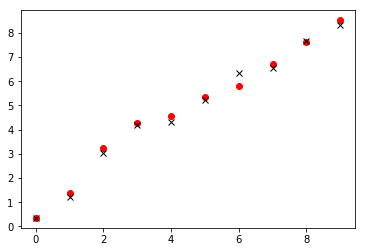

In [7]:
cc = 0
for obs, state in zip(observations, states):
    plt.plot(cc,obs[0],'ro')
    plt.plot(cc,state[0],'kx')
    cc += 1
plt.show()

In [8]:
f,F = lds.filtering(observations)

In [9]:
print f

[array([[0.36440487],
       [0.43836585]]), array([[1.29390454],
       [0.75760283]]), array([[3.0625656 ],
       [1.31840848]]), array([[4.2935055 ],
       [1.27286272]]), array([[4.73604062],
       [0.84588709]]), array([[5.37407722],
       [0.73914312]]), array([[5.87015682],
       [0.61431384]]), array([[6.67236556],
       [0.71081262]]), array([[7.59444664],
       [0.81931568]]), array([[8.50122805],
       [0.86423619]])]


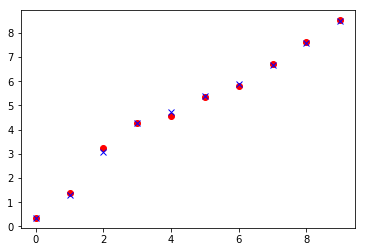

In [10]:
for i in range(len(observations)):
    plt.plot(i,observations[i][0],'ro')
    plt.plot(i,f[i][0],'bx')
plt.show()

In [11]:
h,H = lds.smoothing(observations)

In [12]:
print h

[array([[0.47639251],
       [1.06012221]]), array([[1.58906684],
       [1.16072575]]), array([[3.02383692],
       [0.98728495]]), array([[4.06151238],
       [0.76345365]]), array([[4.6614782 ],
       [0.70311016]]), array([[5.30502793],
       [0.70232711]]), array([[5.9237553],
       [0.7851438]]), array([[6.73158354],
       [0.84527606]]), array([[7.61803172],
       [0.86423619]]), array([[8.50122805],
       [0.86423619]])]


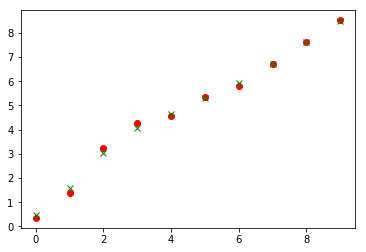

In [13]:
for i in range(len(observations)):
    plt.plot(i,observations[i][0],'ro')
    plt.plot(i,h[i][0],'gx')
plt.show()

In [14]:
len(h)

10

In [15]:
A, B, pi_m, pi_s, E_h, E_o, h_list, H_list = lds.EM(observations,estimate=['A','B','pi_m','pi_s'],num_iterations=40)

In [16]:
len(h_list)

10

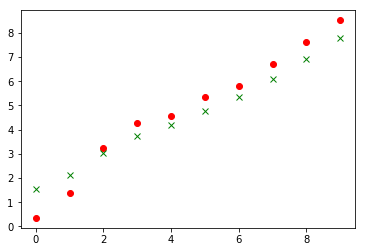

In [17]:
for i in range(len(observations)):
    plt.plot(i,observations[i][0],'ro')
    plt.plot(i,h_list[i][0],'gx')
plt.show()

In [18]:
A

array([[1.01072457, 0.25198378],
       [0.19811954, 0.7231363 ]])

In [19]:
pi_m

array([[1.54793005],
       [2.29264026]])

In [20]:
pi_s

array([[0.0859926 , 0.07873228],
       [0.07873228, 0.23958155]])

In [21]:
B

array([[ 1.42088331, -0.66306963]])